In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext line_profiler

import scqubits as qubit
import scqubits.utils.sweep_plotting as splot
from scqubits import HilbertSpace, ParameterSweep, InteractionTerm
from scqubits.core.storage import SpectrumData

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
N = 3
kmax=1
ECB = 0.2 # 100 fF
ECJ = 20.0/2.7 # 2.7 fF
#ECJ = 20.0
ECg = 20.0 # 0.5 fF
flux = 0.0
EJ = 18.9586
#EJ = 5.0
EJlist = np.array([EJ for j in range(2*N)])
nglist = np.array([0.5 for j in range(2*N)])
nglist[0] = 0.0
num_exc = 2
CMV = qubit.CurrentMirrorVCHOS(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                               kmax=kmax, num_exc=num_exc, squeezing=False, truncated_dim=6)
CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=False, truncated_dim=6)
CMVGS = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=True, truncated_dim=6)
CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=5, truncated_dim=6)

In [15]:
qubit.__version__

'1.2.1'

In [33]:
CMVG.eigenvals()

array([54.68522257, 58.13945804, 58.13950311, 61.43648361, 61.45958433,
       61.46994114])

In [31]:
CMVG.eigenvals()

array([54.68047229, 58.13769918, 58.13769918, 61.43458581, 61.45769302,
       61.46803981])

In [3]:
CMV.Ximat_full()

[[        nan  0.17001493 -0.19734082  0.12897523 -0.28157112 -0.32565527]
 [        nan -0.0858947  -0.24590766 -0.12897523  0.4228113  -0.08102011]
 [        nan -0.25590963 -0.04856683  0.12897523 -0.14124018  0.40667538]
 [        nan -0.17001493  0.19734082 -0.12897523 -0.28157112 -0.32565527]
 [        nan  0.0858947   0.24590766  0.12897523  0.4228113  -0.08102011]
 [        nan  0.25590963  0.04856683 -0.12897523 -0.14124018  0.40667538]] [        nan           +nanj  1.32416037+0.00000000e+00j
  1.32416037+0.00000000e+00j  1.85447871+0.00000000e+00j
  3.79060307+0.00000000e+00j  3.79060307+0.00000000e+00j
         nan           +nanj  0.66208019+1.14675652e+00j
 -0.66208019+1.14675652e+00j -1.85447871+2.27108142e-16j
 -1.89530153-3.28275855e+00j  1.89530153-3.28275855e+00j
         nan           +nanj -0.66208019+1.14675652e+00j
 -0.66208019-1.14675652e+00j  1.85447871-4.54216284e-16j
 -1.89530153+3.28275855e+00j -1.89530153-3.28275855e+00j
         nan           +nanj -1.3241

/home/dkweiss/danny/Git_Code/scqubits/scqubits/scqubits/core/current_mirror_vchos.py:101: RuntimeWarning: invalid value encountered in sqrt
  * np.sqrt(1. / self.Z0) for i in range(len(omegasq))]).T
/home/dkweiss/danny/Git_Code/scqubits/scqubits/scqubits/core/current_mirror_vchos.py:103: RuntimeWarning: invalid value encountered in sqrt
  for x in range(2*self.N) for mu in range(2*self.N)])/np.sqrt(2*self.N)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 36 is different from 6)

In [5]:
CMV.Xi_matrix()*(np.sqrt(CMV.Z0))

array([[-0.08571193,  0.25007139, -0.26178797, -0.24536292,  0.71586603],
       [ 0.17371221,  0.19926441,  0.26178796, -0.49727671, -0.57042354],
       [ 0.25942415, -0.05080699, -0.26178795,  0.74263963, -0.14544249],
       [ 0.08571194, -0.25007139,  0.26178796, -0.24536292,  0.71586603],
       [-0.17371221, -0.19926442, -0.26178797, -0.49727671, -0.57042354]])

In [5]:
np.round(sp.linalg.inv(CMV.Xi_matrix()), decimals=4)

array([[ 0.8286,  2.066 ,  2.4749,  1.6463,  0.4088],
       [ 0.9505,  0.7081, -0.4847, -1.4352, -1.1928],
       [-1.2733,  0.    , -1.2733,  0.    , -1.2733],
       [-0.5751, -0.7217,  0.    , -0.5751, -0.7217],
       [ 0.5013, -0.2474, -0.    ,  0.5013, -0.2474]])

In [13]:
sp.linalg.inv(CM._build_V_m())

array([[-0.83333333, -0.66666667, -0.5       , -0.33333333, -0.16666667,
         0.16666667],
       [ 0.16666667, -0.66666667, -0.5       , -0.33333333, -0.16666667,
         0.16666667],
       [ 0.16666667,  0.33333333, -0.5       , -0.33333333, -0.16666667,
         0.16666667],
       [ 0.16666667,  0.33333333,  0.5       , -0.33333333, -0.16666667,
         0.16666667],
       [ 0.16666667,  0.33333333,  0.5       ,  0.66666667, -0.16666667,
         0.16666667],
       [ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,
         0.16666667]])

In [ ]:
flux_list = np.linspace(0.0, 0.5, 11)
for N in range(4, 8):
    EJlist = np.array([EJ for j in range(2*N)])
    nglist = np.array([0.0 for j in range(2*N)])
    CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                          kmax=kmax, global_exc=num_exc, 
                                          squeezing=False, truncated_dim=6)
    specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, 
                                              get_eigenstates=True, num_cpus=3)
    specdata.filewrite("CM_N_"+str(N)+"_n_5_flux.h5")
    print(N)
    

4


5


6


In [3]:
CMVG.sorted_minima()

array([[5.94284617, 5.94284617, 5.94284617, 5.94284617, 5.94284606],
       [0.70685871, 0.70685871, 0.70685871, 0.7068578 , 0.7068578 ]])

In [10]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CM.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, num_cpus=3)
specdata.filewrite("CM_N_3_n_6_flux.h5")

In [13]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, 
                                          num_cpus=3)
specdata.filewrite("CMVG_N_3_n_5_test2.h5")

Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dkweiss/anacond

In [17]:
ED_datafromfile_8 = SpectrumData.create_from_file("CM_N_3_n_8_flux.h5")

In [19]:
vchos_datafromfile_5 = SpectrumData.create_from_file("CMVG_N_3_n_5_test2.h5")
vchos_datafromfile_4 = SpectrumData.create_from_file("CMVG_N_3_n_4_test2.h5")
vchos_datafromfile_3 = SpectrumData.create_from_file("CMVG_N_3_n_3_test2.h5")
vchos_datafromfile_2 = SpectrumData.create_from_file("CMVG_N_3_n_2_test2.h5")

In [6]:
vchos_datafromfile_4 = SpectrumData.create_from_file("CM_N_4n_5_flux.h5")
vchos_datafromfile_5 = SpectrumData.create_from_file("CM_N_5n_5_flux.h5")
vchos_datafromfile_6 = SpectrumData.create_from_file("CM_N_6n_5_flux.h5")
vchos_datafromfile_7 = SpectrumData.create_from_file("CM_N_7n_5_flux.h5")

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe28278910>)

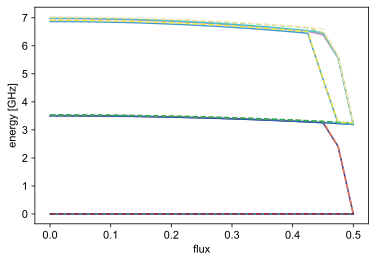

In [28]:
fig, axes = ED_datafromfile_8.plot_evals_vs_paramvals(subtract_ground=True)
#vchos_datafromfile_5.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='-.')
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='--')

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f85f80321d0>)

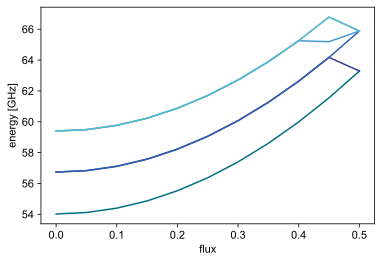

In [7]:
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=False)

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f85d4b99050>)

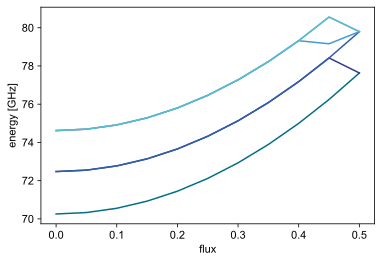

In [8]:
vchos_datafromfile_5.plot_evals_vs_paramvals()

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f85d4a93f50>)

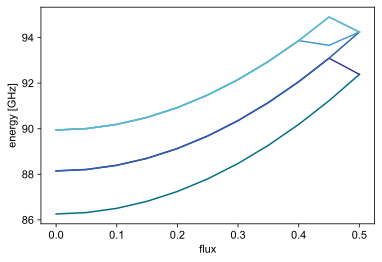

In [9]:
vchos_datafromfile_6.plot_evals_vs_paramvals()

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f85d4681e10>)

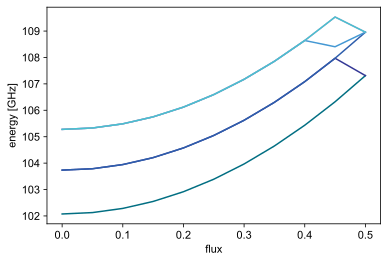

In [10]:
vchos_datafromfile_7.plot_evals_vs_paramvals()

In [16]:
print(vchos_datafromfile_5.energy_table)

[[37.50149237 41.00433994 41.00433994 44.36889741 44.51163414 44.52783869]
 [37.53359121 41.03571051 41.03571051 44.39959457 44.54227749 44.55849277]
 [37.62985786 41.12979172 41.12979172 44.49165507 44.63417645 44.65042399]
 [37.79020262 41.28649202 41.28649202 44.64498598 44.78723777 44.80353922]
 [38.01447599 41.50565879 41.50565879 44.85943235 45.00130595 45.01768321]
 [38.30246859 41.78707826 41.78707826 45.1347771  45.27616316 45.29263847]
 [38.65391115 42.1304754  42.1304754  45.4707409  45.61152907 45.6281251 ]
 [39.06847436 42.53551376 42.53551376 45.86698193 46.00706068 46.02380063]
 [39.54576882 43.00179531 43.00179531 46.32309567 46.46235206 46.47925976]
 [40.08534485 43.52886017 43.52886017 46.83861454 46.97693403 46.99403406]
 [40.68669233 44.11618633 44.11618633 47.41300756 47.55027378 47.56759152]
 [41.34924049 44.76318924 44.76318924 48.04567978 48.1817744  48.19933616]
 [42.07231984 45.46877977 45.4691808  48.73569235 48.86630218 48.88553636]
 [42.85535052 46.23357188

In [18]:
print(ED_datafromfile_8.energy_table)

[[37.50077373 41.00296605 41.00830089 44.36776407 44.4704791  44.48944739]
 [37.53286917 41.03432432 41.03965019 44.39844302 44.50105759 44.52003487]
 [37.62912556 41.12836844 41.13366746 44.49044864 44.59276106 44.61176569]
 [37.78945308 41.28500631 41.29026081 44.64368729 44.74549356 44.76454493]
 [38.013702   41.50408436 41.50927703 44.85800277 44.95909498 44.97821425]
 [38.30166262 41.78538743 41.79050148 45.13317621 45.23334086 45.25255172]
 [38.65306521 42.12863866 42.13365792 45.46892586 45.56794202 45.58727148]
 [39.06757991 42.53349924 42.53840829 45.86490677 45.96254412 45.98202336]
 [39.54481657 42.99956814 43.00435246 46.32071044 46.41672703 46.43639238]
 [40.08432463 43.52638181 43.53102787 46.83586434 46.93000411 46.94989803]
 [40.68559284 44.11341369 44.11790905 47.40983129 47.5018212  47.5219935 ]
 [41.34804902 44.76007371 44.76440712 48.04200874 48.13155547 48.15206456]
 [42.07105973 45.46570759 45.46986907 48.73172781 48.81851389 48.83942829]
 [42.85392979 46.22959604

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feaa5200310>)

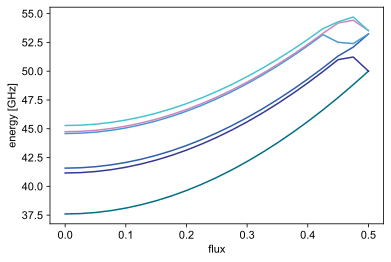

In [8]:
datafromfile.plot_evals_vs_paramvals(subtract_ground=False)

In [8]:
print(datafromfile.state_table[0][0])

[ 9.97552811e-01+0.j -1.04133692e-16+0.j  1.82897008e-16+0.j
 -2.53374904e-15+0.j -4.40978258e-02+0.j  2.28694866e-12+0.j]


In [10]:
print(datafromfile.system_params)

{'ECB': 0.2, 'ECJ': 7.4074074074074066, 'ECg': 20.0, 'N': 3, 'flux': 0.0, 'global_exc': 2, 'kmax': 1, 'squeezing': False, 'truncated_dim': 6, 'EJlist': array([18.9586, 18.9586, 18.9586, 18.9586, 18.9586, 18.9586]), 'nglist': array([0., 0., 0., 0., 0.])}


In [16]:
datafromfile.state_table[0]

array([[ 9.97552811e-01+0.j, -1.04133692e-16+0.j,  1.82897008e-16+0.j,
        -2.53374904e-15+0.j, -4.40978258e-02+0.j,  2.28694866e-12+0.j],
       [-1.24900090e-16+0.j, -8.81251469e-01+0.j,  4.72647700e-01+0.j,
        -9.50469074e-16+0.j,  7.49400541e-16+0.j, -1.82427857e-15+0.j],
       [ 6.24500549e-17+0.j, -4.72647700e-01+0.j, -8.81251469e-01+0.j,
        -1.45937050e-15+0.j, -9.99200700e-16+0.j, -6.95136223e-16+0.j],
       [-1.90819664e-17+0.j,  1.46757611e-15+0.j,  8.64326123e-16+0.j,
        -1.00000000e+00+0.j,  5.76205749e-14+0.j,  9.20555542e-14+0.j],
       [-1.36423537e-23+0.j, -4.08094026e-16+0.j,  4.12863862e-16+0.j,
        -9.02096936e-17+0.j, -4.59327985e-22+0.j,  6.15826895e-17+0.j],
       [ 2.62927838e-23+0.j,  1.80118239e-16+0.j,  1.12540797e-16+0.j,
         1.34569564e-18+0.j,  6.12392745e-22+0.j, -7.21612309e-17+0.j],
       [ 3.09960923e-02+0.j,  1.45071741e-15+0.j, -9.21296786e-16+0.j,
        -2.47306551e-14+0.j,  7.06413840e-01+0.j, -7.06756647e-01+0.j],

In [4]:
print(CMVG.eigvec_population(eigvec[:,0]))

(array([ 9.95078708e-01,  3.64965310e-02,  3.64965310e-02,  3.64757641e-02,
        3.64757641e-02,  3.60731385e-02,  3.60731385e-02,  3.60634225e-02,
        8.90473869e-03,  8.90473869e-03,  6.40317184e-03,  6.40317184e-03,
        4.78557124e-03,  4.48065828e-03,  4.06852162e-03,  4.06852162e-03,
        4.03671613e-03,  4.03671613e-03,  4.03671613e-03,  4.03671613e-03,
       -3.85029482e-03,  2.98806180e-03, -2.98806180e-03,  2.84585659e-03,
        2.84585659e-03, -2.72256957e-03,  2.72256957e-03,  2.65243590e-03,
        2.65243590e-03,  2.57700163e-03,  2.57700163e-03,  2.57700163e-03,
        2.57700163e-03,  2.57403604e-03,  2.57403604e-03,  2.45491857e-03,
        2.45491857e-03,  2.16570484e-03,  2.09791343e-03, -2.09791343e-03,
       -2.09791343e-03, -2.09791343e-03, -2.02171300e-03,  2.02171300e-03,
        2.02171300e-03, -2.02171300e-03,  1.98298045e-03,  1.98298045e-03,
       -1.79563144e-03,  1.79019878e-03,  1.79019878e-03, -1.65939451e-03,
        1.65939451e-03, 

In [5]:
%time CMVG.eigenvals()

CPU times: user 784 ms, sys: 11 ms, total: 795 ms
Wall time: 1.09 s


array([42.12005065, 45.71607178, 45.7165389 , 49.03868562, 49.16092466,
       49.1631378 ])

In [33]:
phik_1 = np.array([-1, 0, 1, -1, 0])
phik_2 = np.array([-1, 1, 0, -1, 1])
phik_3 = np.array([0, -1, 1, 0, -1])
#print(np.dot(np.array([-1, 0, 1, -1, 0]), np.array([-1, 1, 0, -1, 1]))/(np.sqrt(3)*2))
dpkX_1 = np.matmul(delta_inv, phik_1)
dpkX_2 = np.matmul(delta_inv, phik_2)
dpkX_3 = np.matmul(delta_inv, phik_3)
print(dpkX_1, dpkX_2, dpkX_3)

[-1.19903871e+00 -5.99519356e-01  4.88498131e-15 -1.19903871e+00
 -5.99519356e-01] [-5.99519356e-01  5.99519356e-01  8.88178420e-16 -5.99519356e-01
  5.99519356e-01] [-5.99519356e-01 -1.19903871e+00  3.55271368e-15 -5.99519356e-01
 -1.19903871e+00]


In [44]:
Xi = CMVG.Xi_matrix()
Xi_inv = sp.linalg.inv(Xi)
evalsxi, evecsxi = sp.linalg.eig(Xi_inv)
#print(Xi_inv)
print(evalsxi)
print(evecsxi)
delta_inv = np.matmul(Xi_inv.T, Xi_inv)
#print(delta_inv)
evals, evecs = sp.linalg.eigh(delta_inv)
print(evals)
#print(evecs[:,2])
#print(evecs[:,3])
print(evecs[:,0])
print(evecs[:,1])

[ 3.40554675+0.j          1.04295503+0.61359158j  1.04295503-0.61359158j
  0.02596119+1.43551626j  0.02596119-1.43551626j -1.65041704+0.j
 -1.36487496+0.j        ]
[[-0.43589145+0.j         -0.17441221-0.28040948j -0.17441221+0.28040948j
  -0.29839499-0.40679528j -0.29839499+0.40679528j -0.68056919+0.j
   0.35180214+0.j        ]
 [-0.70632377+0.j          0.25330516+0.37097416j  0.25330516-0.37097416j
  -0.14102344+0.29700037j -0.14102344-0.29700037j -0.16005921+0.j
   0.41240495+0.j        ]
 [-0.4462041 +0.j         -0.4502077 +0.09414549j -0.4502077 -0.09414549j
  -0.2540201 -0.17086302j -0.2540201 +0.17086302j  0.64037869+0.j
  -0.60560243+0.j        ]
 [-0.19868068+0.j          0.20834793+0.00703964j  0.20834793-0.00703964j
   0.5829043 +0.j          0.5829043 -0.j          0.05874976+0.j
  -0.21737439+0.j        ]
 [ 0.10606262+0.j          0.15801112-0.38720884j  0.15801112+0.38720884j
  -0.13832726-0.0735677j  -0.13832726+0.0735677j   0.18650308+0.j
  -0.0536571 +0.j        ]
 

In [16]:
print(eigvals)

[6.76252592e+00+0.j 6.71954229e+00+0.j 6.60247130e+00+0.j
 6.48936423e+00+0.j 6.11232503e+00+0.j 5.84179235e+00+0.j
 4.73905775e+00+0.j 3.76078830e+00+0.j 2.83586914e+00+0.j
 3.68931858e-01+0.j 3.43262285e-01+0.j 3.03049986e-01+0.j
 2.52184573e-01+0.j 1.93798450e-01+0.j 1.37815857e-01+0.j
 8.11342701e-02+0.j 4.35692676e-02+0.j 2.91288860e-03+0.j
 9.72720646e-03+0.j]


In [12]:
CM.eigenvals()

array([37.601148  , 41.16169766, 41.58431718, 44.58687847, 44.74803526,
       45.28464285])

In [13]:
print(np.exp(-0.25*180))

2.8625185805493937e-20


In [3]:
CMVG.flux = 0.3
CMVGevals = CMVG.eigenvals()
CMVGSevals = CMVGS.eigenvals()

TypeError: unsupported operand type(s) for +: 'method' and 'complex'

In [5]:
print(CMVGevals)
print(CMVGSevals)

[37.52668893 41.218532   41.218532   44.6343957  44.75691953 44.75735061]
[37.52668893 41.218532   41.218532   44.6343957  44.75691953 44.75735061]


In [11]:
CMevals = CM.eigenvals()

In [12]:
print(CMevals)

[48.53400497 51.42091481 51.76653164 51.78482204 54.57578881 54.5914451 ]


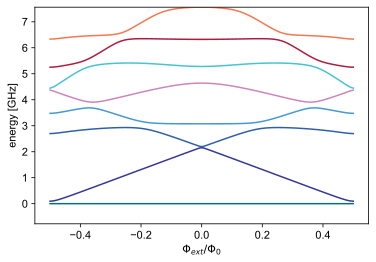

In [10]:
qbt = qubit.Fluxonium(
    EJ=2.55,
    EC=0.72,
    EL=0.12,
    flux=0.0,
    cutoff=110,
    truncated_dim=9
)

hilbertspace = qubit.HilbertSpace([qbt])

hilbertspace.interaction_list = []

param_name = r'$\Phi_{ext}/\Phi_0$'
param_vals = np.linspace(-0.5, 0.5, 100)

subsys_update_list = [qbt]


def update_hilbertspace(param_val):
    qbt.flux = param_val


sweep = ParameterSweep(
    param_name=param_name,
    param_vals=param_vals,
    evals_count=8,
    hilbertspace=hilbertspace,
    subsys_update_list=subsys_update_list,
    update_hilbertspace=update_hilbertspace,
)

splot.dressed_spectrum(sweep);

In [11]:
hilbertspacevchos = HilbertSpace([CMV])
hilbertspacevchos.interaction_list = []
points = 11
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CMV]

param_name = 'flux'
def update_hilbertspace(param_val):
    CMV.flux = param_val
    
sweep = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspacevchos,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace, num_cpus=3)

In [4]:
hilbertspcvchos = HilbertSpace([CMVG])
hilbertspcvchos.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CMVG]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
#    nglist[0] = param_val
    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CMVG._build_V_m()
    CMVG.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]

param_name = 'flux'
def update_hilbertspace(param_val):
    CMVG.flux = param_val
    
sweep = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcvchos,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace, num_cpus=3)

In [8]:
sweep.

AttributeError: 'NoneType' object has no attribute '_bare_specdata_list'

In [27]:
hilbertspcED = HilbertSpace([CM])
hilbertspcED.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CM]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CM._build_V_m()
    CM.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]
    
param_name = 'ng'
def update_hilbertspace(param_val):
    CM.flux = param_val
    
sweepED = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcED,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace, num_cpus=3)

In [43]:
sweepED.

{'subsystem_list': (CurrentMirror(**{'N': 3, 'ECB': 0.2, 'ECJ': 20.0, 'ECg': 40.0, 'EJlist': array([5., 5., 5., 5., 5., 5.]), 'nglist': array([0., 0., 0., 0., 0.]), 'flux': 0.0, 'ncut': 5, 'truncated_dim': 6}),),
 'interaction_list': []}

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f366e890c90>)

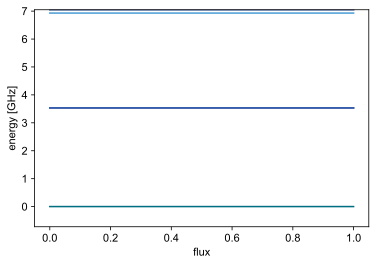

In [12]:
splot.dressed_spectrum(sweep)

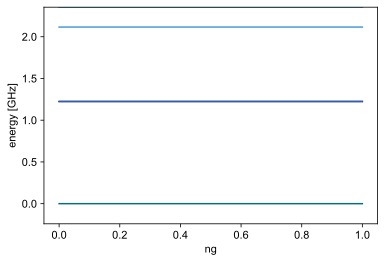

In [29]:
splot.dressed_spectrum(sweepED);

In [7]:
CMVG.flux=0.49
CMVG.eigenvals()

array([92.29396723, 92.78593649, 94.51633669, 94.51633669, 95.01706653,
       95.01706653])

In [8]:
evals, evecs = CMVG.eigensys()

In [15]:
print(evecs[:,5])

[-3.98949674e-14+0.j  6.22280715e-10+0.j -2.00002836e-08+0.j
  2.83627439e-14+0.j -2.50621365e-16+0.j  9.10941232e-15+0.j
 -1.16887452e-14+0.j -3.99283310e-16+0.j  1.10872549e-16+0.j
 -9.44693595e-16+0.j -5.53561624e-16+0.j  9.47766780e-16+0.j
  1.17981629e-13+0.j  2.34328677e-13+0.j  5.42845402e-14+0.j
  5.20714722e-16+0.j  1.82696912e-14+0.j -2.67507080e-14+0.j
  2.05750274e-10+0.j -7.56786198e-12+0.j -4.75990476e-15+0.j
 -1.71030583e-15+0.j  3.48319905e-15+0.j  2.50749817e-13+0.j
  7.36366727e-14+0.j  4.13757822e-15+0.j  2.49205151e-14+0.j
 -3.65027171e-14+0.j -7.57466042e-12+0.j -2.05751150e-10+0.j
 -6.48815528e-15+0.j -2.39549760e-15+0.j  4.98811864e-15+0.j
  2.26629332e-14+0.j -1.55990104e-16+0.j  1.35064691e-14+0.j
 -1.96454173e-14+0.j  7.83761611e-11+0.j  1.94144076e-11+0.j
  6.08392206e-11+0.j -1.50703340e-11+0.j  3.68327141e-15+0.j
 -5.09524555e-16+0.j -3.49382690e-17+0.j  9.10616670e-16+0.j
  1.94126158e-11+0.j -7.83796500e-11+0.j -1.50693450e-11+0.j
 -6.08435021e-11+0.j  2.

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c5e6d64d0>)

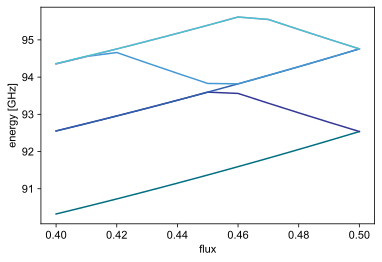

In [6]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

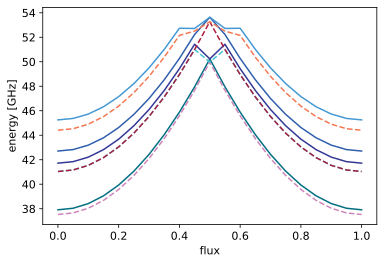

In [4]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [24]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

[[[0 1]
  [1 0]]

 [[0 1]
  [1 0]]]


AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

In [4]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

In [3]:
a_op_list = np.array([CMVG.a_operator(i) for i in range(CMVG.num_deg_freedom)])
minima_list = CMVG.sorted_minima()
minima_diff = minima_list[1]-minima_list[2]
Xi = CMVG.Xi_matrix()
%lprun -f CMVG._build_squeezing_ops CMVG._build_squeezing_ops(1, 2, minima_diff, Xi, a_op_list)

In [7]:
%lprun -f CMVG.potentialmat CMVG.potentialmat()

In [28]:
%lprun -f CMV.potentialmat CMV.potentialmat()

In [26]:
%lprun -f CMV.hamiltonian CMV.hamiltonian()

In [5]:
eigvals = CMV.eigenvals()
print(eigvals)

[37.51394954 41.0467031  41.04677482 44.44385195 44.54820087 44.56440727]


In [7]:
eigvals = CMV.eigenvals()
print(eigvals-eigvals[0])

[0.         2.79611152 2.81102498 5.58158613 5.59865452 5.60723912]


In [3]:
evals_holder_vchos = []
for ncut in range(1, 4):
    print(ncut)
    CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                           kmax=1, global_exc=ncut, squeezing=False)
    evals = CMVG.eigenvals()
    evals_holder_vchos.append(evals)

1
2
3


In [4]:
evals_holder_ED = []
for ncut in range(1, 6):
    print(ncut)
    CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=ncut)
    evals = CM.eigenvals()
    evals_holder_ED.append(evals)

1
2
3
4
5


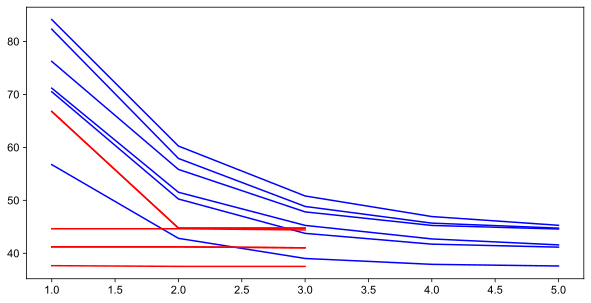

In [5]:
ncut_list = np.arange(1, 6)
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(ncut_list, evals_holder_ED, color="blue")
plt.plot(ncut_list[0:3], evals_holder_vchos, color="red")
plt.show()

In [11]:
print(evals_holder)

[array([56.70140312, 70.46042775, 71.13782448, 76.19151844, 82.26184779,
       84.08820282]), array([42.80612023, 50.22657124, 51.50082666, 55.82116382, 57.87979284,
       60.22545979]), array([39.01382439, 43.75076327, 45.25837763, 47.81235394, 48.82732037,
       50.8098161 ]), array([37.91111698, 41.7203811 , 42.70902272, 45.25314106, 45.68702751,
       46.93290294]), array([37.60014853, 41.15974483, 41.58172879, 44.58520793, 44.7446738 ,
       45.28091933]), array([37.52073588, 41.03067135, 41.1629697 , 44.41647763, 44.52028604,
       44.689744  ])]


## Nearest Neighbor Calc 

In [13]:
def x0p(x0, y0, theta):
    return (x0*np.cos(theta)-y0*np.sin(theta))
def y0p(x0, y0, theta):
    return (x0*np.sin(theta)+y0*np.cos(theta))
def result(x0, y0, alpha, theta):
    return alpha*np.exp(-0.25*x0p(x0, y0, theta)**2)*np.exp(-0.25*(y0p(x0, y0, theta)/alpha)**2)
num = 100
mat = np.zeros((num, num))
for i, theta in enumerate(np.linspace(0, np.pi/2, num)):
    for j, e in enumerate(np.linspace(0.01, 1.0, num)):
        alpha = np.sqrt(1-e**2)
        nn_1 = result(2*np.pi, 0, alpha, theta)
        nn_2 = result(-2*np.pi, 0, alpha, theta)
        nn_3 = result(0, 2*np.pi, alpha, theta)
        nn_4 = result(0, -2*np.pi, alpha, theta)
        nn_max = np.max(np.array([nn_1, nn_2, nn_3, nn_4]))
        
        next_nn_1 = result(2*np.pi, 2*np.pi, alpha, theta)
        next_nn_2 = result(-2*np.pi, 2*np.pi, alpha, theta)
        next_nn_3 = result(2*np.pi, -2*np.pi, alpha, theta)
        next_nn_4 = result(-2*np.pi, -2*np.pi, alpha, theta)
        next_nn_max = np.max(np.array([next_nn_1, next_nn_2, next_nn_3, next_nn_4]))
        if next_nn_max > nn_max:
            mat[i, j] = 1.0
        else:
            mat[i, j] = -1.0

/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


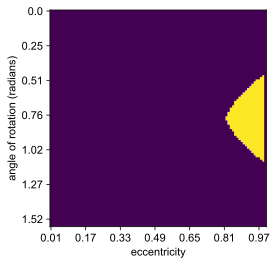

In [14]:
plt.imshow(mat)
x = np.linspace(0.01, 1.0, num)
y = np.linspace(0, np.pi/2, num)
nx = x.shape[0]
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step = int(nx / (no_labels - 1))
x_positions = np.arange(0,nx,step) # pixel count at label position
y_positions = np.arange(0,ny,step)
x_labels = np.round(x, decimals=2)[::step] # labels you want to see
y_labels = np.round(y, decimals=2)[::step]
plt.xticks(x_positions, x_labels)
plt.yticks(y_positions, y_labels)
plt.xlabel("eccentricity")
plt.ylabel("angle of rotation (radians)")
plt.show()